In [78]:
import pandas as pd
import numpy as np
import seaborn as sns

In [79]:
data=pd.read_csv('datasets_34879_46976_500_Person_Gender_Height_Weight_Index.csv')

In [80]:
data

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3
...,...,...,...,...
495,Female,150,153,5
496,Female,184,121,4
497,Female,141,136,5
498,Male,150,95,5


In [81]:
data.head()

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


In [82]:
data.tail()

,Gender,Height,Weight,Index
495,Female,150,153,5
496,Female,184,121,4
497,Female,141,136,5
498,Male,150,95,5
499,Male,173,131,5


In [83]:
data.describe()

,Height,Weight,Index
count,500.000000,500.000000,500.000000
mean,169.944000,106.000000,3.748000
std,16.375261,32.382607,1.355053
min,140.000000,50.000000,0.000000
25%,156.000000,80.000000,3.000000
50%,170.500000,106.000000,4.000000
75%,184.000000,136.000000,5.000000
max,199.000000,160.000000,5.000000


In [84]:
from sklearn import svm
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split

In [85]:
data.head()

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


In [86]:
gender = LabelEncoder() # used to convert the categorical value to 0&1
data['Gender'] = gender.fit_transform(data['Gender'])

In [87]:
data.head()

,Gender,Height,Weight,Index
0,1,174,96,4
1,1,189,87,2
2,0,185,110,4
3,0,195,104,3
4,1,149,61,3


In [88]:
bins = (-1,0,1,2,3,4,5)
health = ['malnourished','underweight','fit','slightly overweight','overweight','obese']
data['Index'] = pd.cut(data['Index'],bins=bins,labels = health)

In [89]:
data.head()

,Gender,Height,Weight,Index
0,1,174,96,overweight
1,1,189,87,fit
2,0,185,110,overweight
3,0,195,104,slightly overweight
4,1,149,61,slightly overweight


In [90]:
data['Index'].value_counts()

obese                  198
overweight             130
fit                     69
slightly overweight     68
underweight             22
malnourished            13
Name: Index, dtype: int64

In [91]:
data['Gender'].value_counts()

0    255
1    245
Name: Gender, dtype: int64

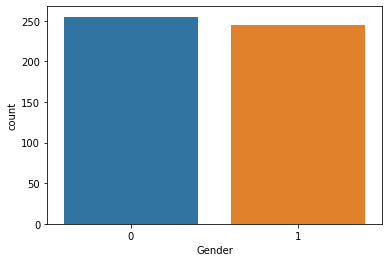

In [92]:
sns.countplot(data['Gender'])

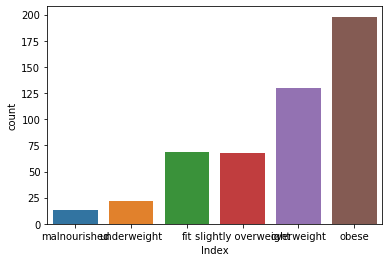

In [93]:
sns.countplot(data['Index'])

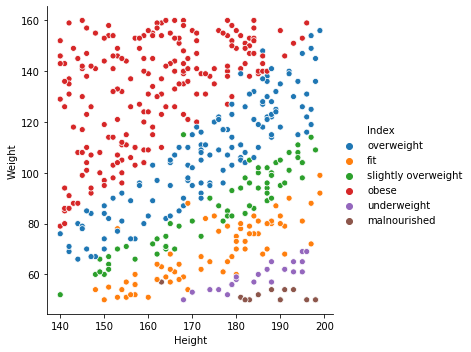

In [94]:
sns.relplot(x='Height',y='Weight',hue='Index',data=data)

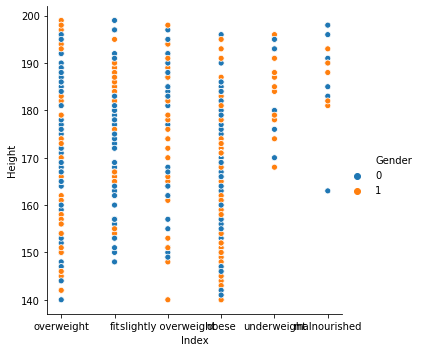

In [95]:
sns.relplot(x='Index',y='Height',hue='Gender',data=data )

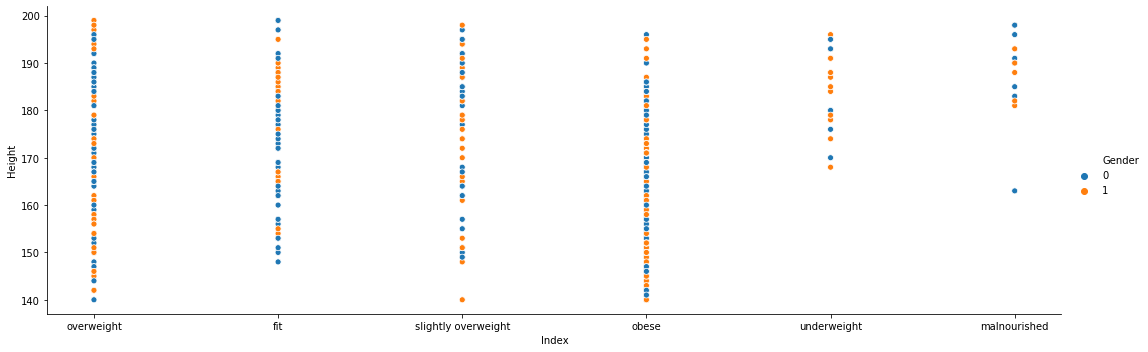

In [96]:
sns.relplot(x='Index',y='Height',hue='Gender',data=data ,height=5,aspect=3 )

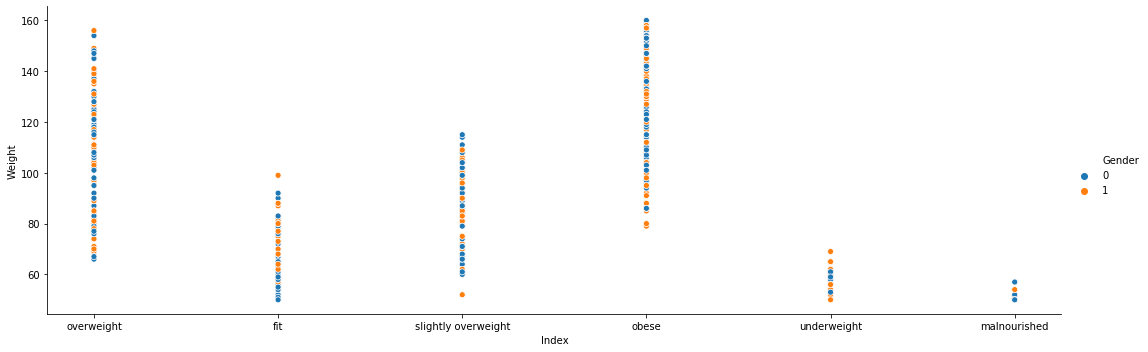

In [97]:
sns.relplot(x='Index',y='Weight',hue='Gender',data=data ,height=5,aspect=3 )

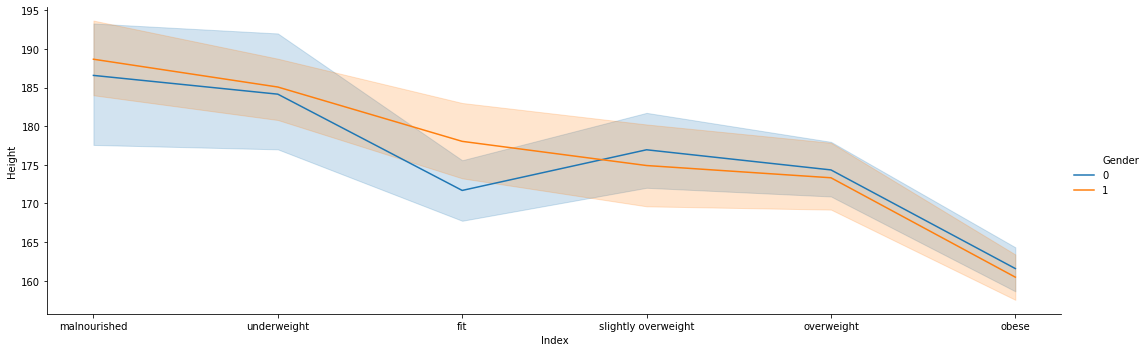

In [98]:
sns.relplot(x='Index',y='Height',hue='Gender',kind ='line',data=data ,height=5,aspect=3 )

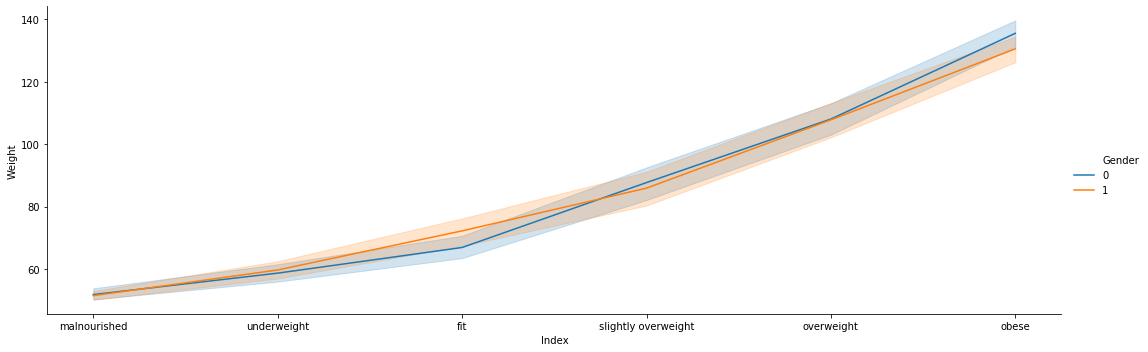

In [99]:
sns.relplot(x='Index',y='Weight',hue='Gender',kind='line',data=data ,height=5,aspect=3 )

In [100]:
x=data.drop('Index',axis=1) #training data
y=data['Index'] #testing data

In [101]:
x_train , x_test, y_train , y_test = train_test_split(x,y,test_size= 0.2,random_state=0)

In [102]:
s = StandardScaler()
x_train= s.fit_transform(x_train)
x_test = s.transform(x_test)

In [103]:
clf = svm.SVC()
clf.fit(x_train,y_train)
pred = clf.predict(x_test)

In [77]:
print(classification_report(y_test,pred))

                     precision    recall  f1-score   support

                fit       0.73      0.80      0.76        10
       malnourished       0.00      0.00      0.00         3
              obese       0.88      0.97      0.92        36
         overweight       0.96      0.78      0.86        32
slightly overweight       0.78      0.93      0.85        15
        underweight       0.60      0.75      0.67         4

           accuracy                           0.85       100
          macro avg       0.66      0.71      0.68       100
       weighted avg       0.84      0.85      0.84       100



In [104]:
print(confusion_matrix(y_test,pred))

[[ 8  0  0  0  2  0]
 [ 1  0  0  0  0  2]
 [ 0  0 35  1  0  0]
 [ 0  0  5 25  2  0]
 [ 1  0  0  0 14  0]
 [ 1  0  0  0  0  3]]


In [105]:
print(accuracy_score(y_test,pred))

0.85


In [109]:
a= [[0,185,110]] # 0- female, height - 160 , weight- 48
a = s.transform(a)
b=clf.predict(a) # prediction

In [110]:
b

array(['overweight'], dtype=object)

In [108]:
data

,Gender,Height,Weight,Index
0,1,174,96,overweight
1,1,189,87,fit
2,0,185,110,overweight
3,0,195,104,slightly overweight
4,1,149,61,slightly overweight
...,...,...,...,...
495,0,150,153,obese
496,0,184,121,overweight
497,0,141,136,obese
498,1,150,95,obese
